In [1]:
from qiskit_algorithms.utils import algorithm_globals
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit_machine_learning.algorithms import VQR

algorithm_globals.random_seed = 42


#### 1. Generate a synthetic dataset


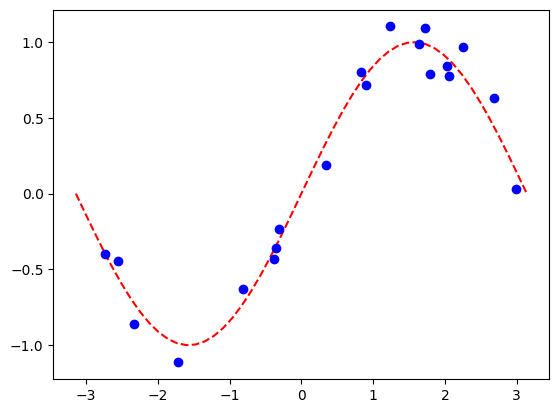

In [2]:


num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X_fake = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y_fake = f(X_fake[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X_fake, y_fake, "bo")
plt.show()

In [3]:
objective_func_vals = []

#### Function to plot the objective function value against iteration

In [4]:
def callback_graph(weights, obj_func_eval):
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

#### 2. Construct the feature map and ansatz

In [5]:

param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)



#### Define the VQR instance using the feature map and ansatz

In [6]:

vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

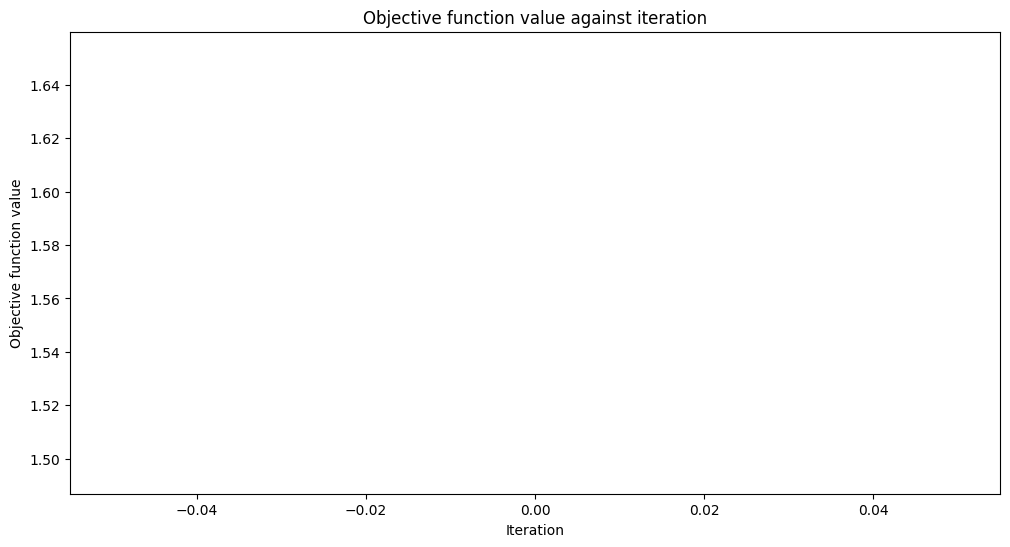

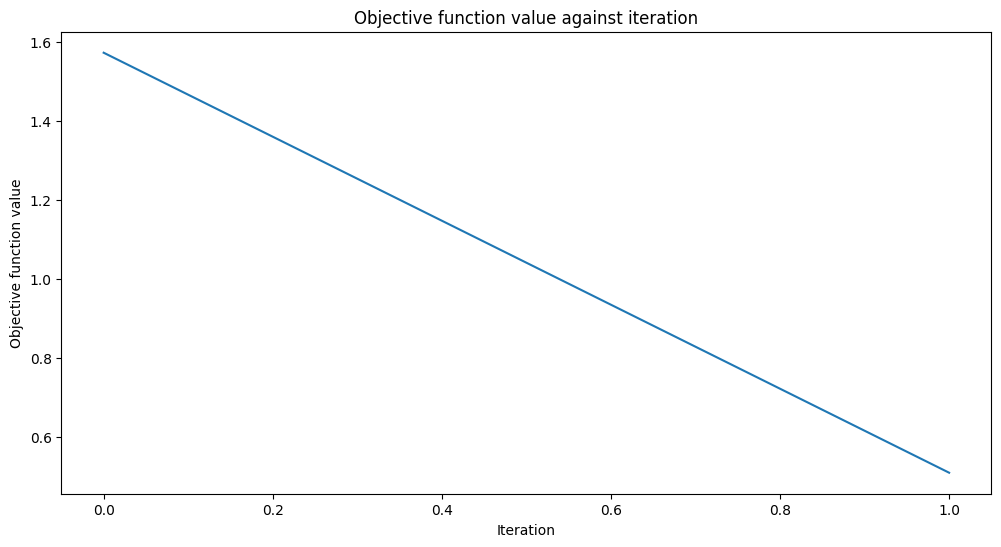

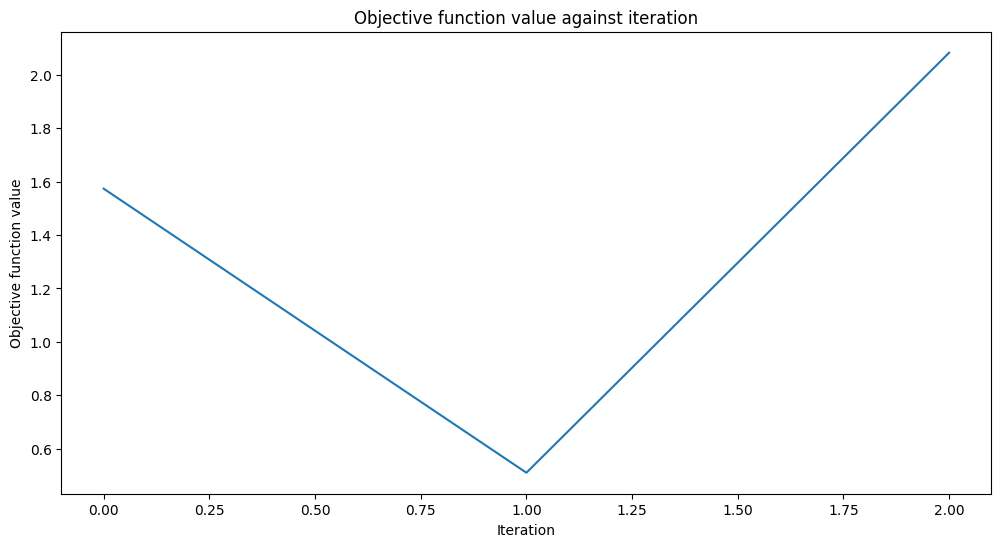

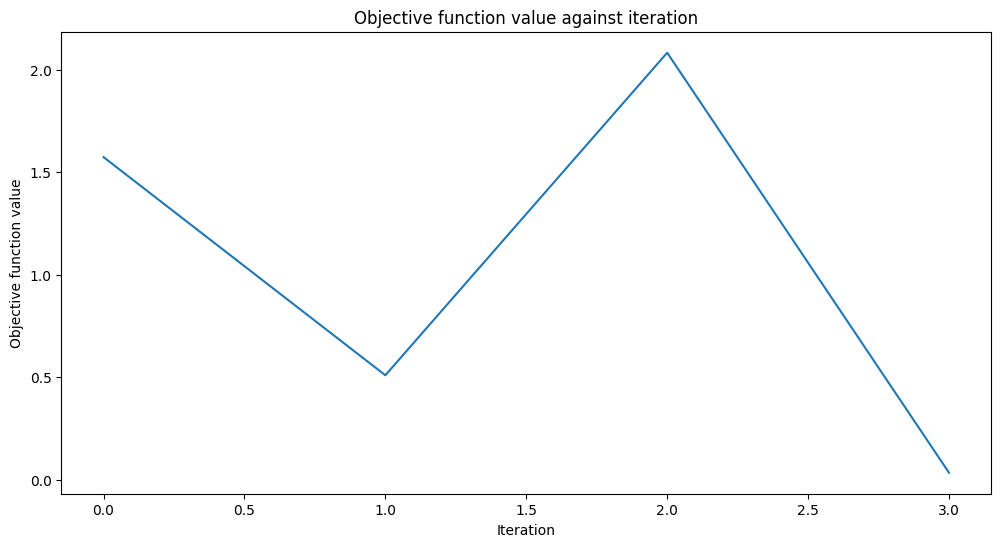

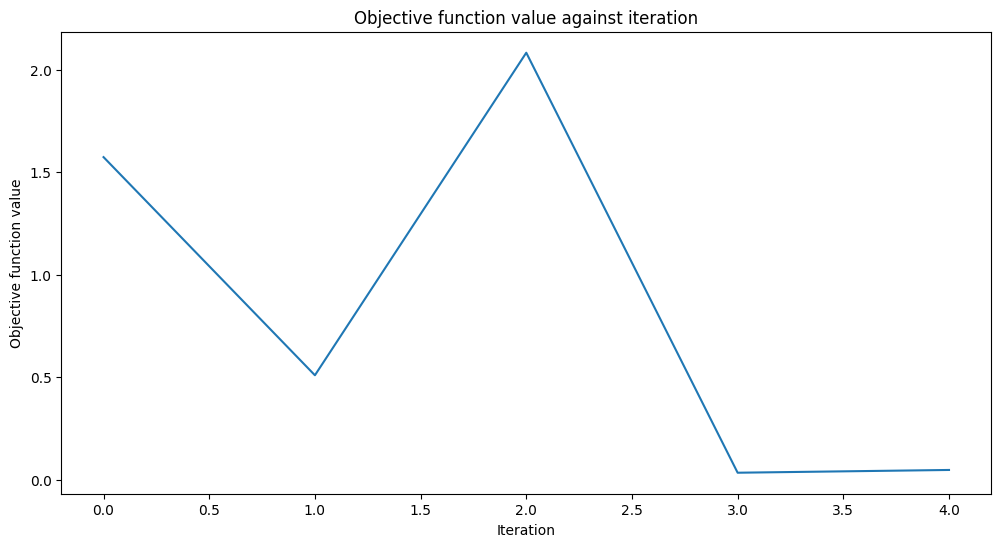

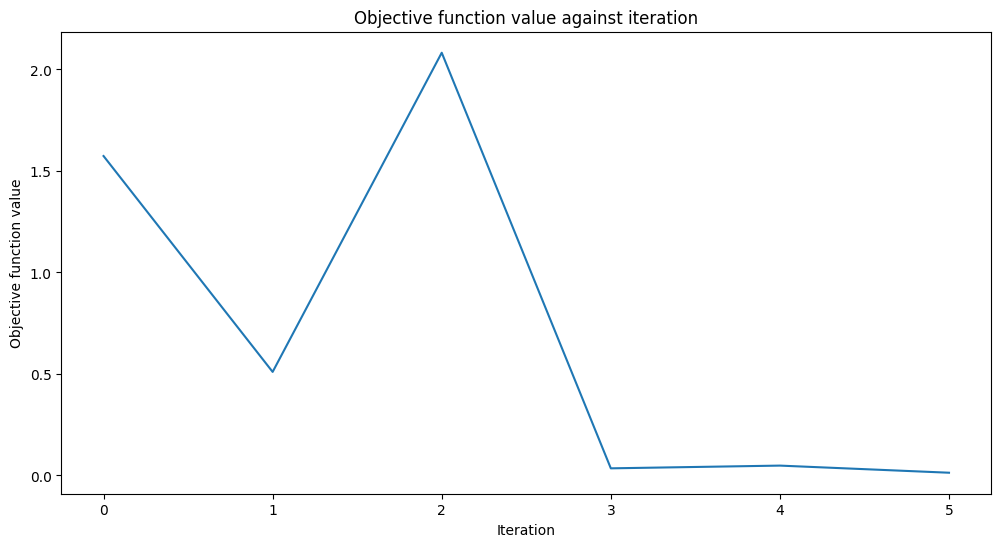

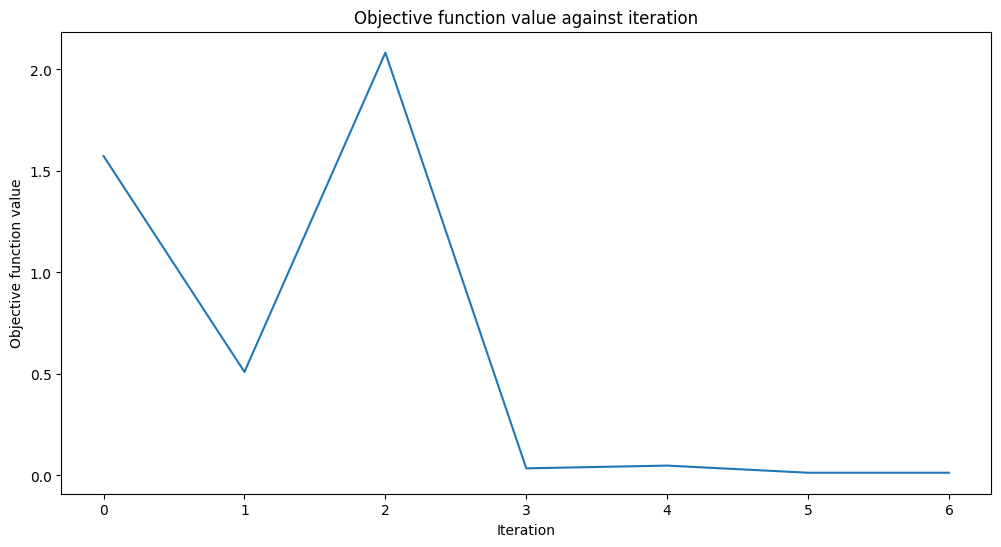

0.9733353285953001

In [7]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X_fake, y_fake)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score result
vqr.score(X_fake, y_fake)

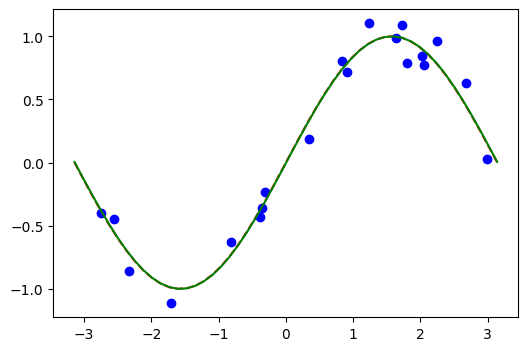

In [8]:
# plot target function
plt.plot(X_, f(X_), "r--")

# plot data
plt.plot(X_fake, y_fake, "bo")

# plot fitted line
y_ = vqr.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()